# Portfolio Exploration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# You cannot run this demo yet
## You do not have some functions it imports
#### This notebook relies on the functions in `cmds/portfolio.py`, which it assumes is in the repo.

See the last three lines in the cell above. It calls the path to `portfolio.py` then it loads all the functions from `portfolio.py`.

In [2]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import *

In [3]:
info = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

rets = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='total returns')
rets.set_index('Date',inplace=True)

ff = pd.read_excel('../data/fama_french_data.xlsx',sheet_name='total returns')
ff.rename(columns={'Unnamed: 0':'Date'},inplace=True)
ff.set_index('Date',inplace=True)

retsx = rets.subtract(ff['RF'],axis=0)
ffx = ff[['MKT','SMB','HML','UMD']].subtract(ff['RF'],axis=0)

In [4]:
retsx

,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
Date,,,,,,,,,,,,,,,
2000-01-31,0.075587,0.138880,-0.121654,-0.054279,-0.010977,0.136223,-0.118479,0.020436,0.027087,0.096062,0.071695,-0.026199,-0.027377,-0.014071,0.074929
2000-02-29,0.096641,0.032890,-0.105110,-0.057130,-0.051617,-0.026077,-0.146366,-0.010002,-0.040398,-0.017587,-0.027027,0.034542,-0.049505,-0.071836,0.464650
2000-03-31,-0.120704,0.061943,0.033338,0.057717,-0.021357,0.022508,0.264117,0.029995,0.057041,0.083579,0.092974,-0.058405,-0.010247,0.011818,-0.168324
2000-04-30,-0.047723,0.061953,-0.085603,-0.070850,-0.082210,-0.046396,-0.130024,0.024221,-0.080863,-0.039430,-0.056507,-0.017890,-0.016552,-0.017100,0.037549
2000-05-31,0.122040,0.381819,-0.029134,0.122175,-0.013347,0.119394,0.458178,-0.092273,0.129159,-0.022094,0.000587,-0.015921,-0.008831,0.021582,-0.067440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.074713,0.123850,0.133198,-0.002555,0.486969,0.080984,0.149628,-0.041124,0.201456,0.093440,0.311475,0.030368,0.053848,0.118911,0.127409
2021-05-31,0.043095,0.018765,0.160057,0.029889,0.043652,-0.060734,0.022379,-0.001078,-0.106397,-0.025780,-0.112500,0.076257,0.083588,0.045434,-0.043843
2021-06-30,0.100422,0.215673,-0.016323,-0.021144,0.000000,0.053215,-0.007488,0.057605,-0.035795,-0.111565,0.057480,-0.073009,-0.076462,-0.086706,-0.045429


In [5]:
performanceMetrics(retsx,annualization=12, quantile=.01)

,Mean,Vol,Sharpe,Min,Max,VaR (0.01),CVaR (0.01)
CL1,0.108693,0.391642,0.277532,-0.543649,0.883658,-0.216616,-0.364214
NG1,0.143983,0.538050,0.267601,-0.421564,0.626034,-0.359040,-0.387461
KC1,0.044952,0.320862,0.140099,-0.227702,0.436102,-0.178085,-0.215264
CC1,0.084777,0.324568,0.261199,-0.281729,0.340246,-0.198135,-0.231438
LB1,0.130929,0.400752,0.326709,-0.340402,0.584058,-0.239297,-0.295162
CT1,0.057246,0.307133,0.186389,-0.361162,0.245792,-0.206863,-0.263189
SB1,0.091350,0.346734,0.263458,-0.312574,0.458178,-0.201494,-0.263214
LC1,0.029568,0.187609,0.157604,-0.216805,0.160830,-0.127181,-0.166227
W1,0.076058,0.311558,0.244120,-0.252477,0.423246,-0.192157,-0.220833
S1,0.071260,0.265057,0.268849,-0.329667,0.194126,-0.214099,-0.253901


In [6]:
maximumDrawdown(retsx)

,Max Drawdown,Peak,Bottom,Recover,Peak to Recover
CL1,-0.873793,2008-06-30,2020-04-30,NaT,NaT
NG1,-0.901517,2005-09-30,2020-03-31,NaT,NaT
KC1,-0.704378,2011-04-30,2019-04-30,NaT,NaT
CC1,-0.511534,2011-02-28,2017-04-30,NaT,NaT
LB1,-0.711663,2004-08-31,2009-02-28,2018-04-30,4990 days
CT1,-0.763970,2011-02-28,2020-03-31,NaT,NaT
SB1,-0.710916,2011-01-31,2020-04-30,NaT,NaT
LC1,-0.494730,2014-11-30,2020-04-30,NaT,NaT
W1,-0.669502,2008-02-29,2016-08-31,NaT,NaT
S1,-0.548402,2012-08-31,2020-05-31,NaT,NaT


MIN Correlation pair is ('GC1', 'LC1'):
Gold, COMEX Gold Futures with Cattle, CME Live Cattle Futures.

MAX Correlation pair is ('GC1', 'SI1'):
Gold, COMEX Gold Futures with Silver, COMEX Silver Futures.


,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
CL1,NaN,0.178206,0.090899,0.169494,0.290958,0.175762,0.193092,0.141964,0.048616,0.130951,0.132927,0.153956,0.316726,0.374421,0.220460
NG1,0.178206,NaN,0.035007,-0.023366,-0.037593,0.008078,0.111896,-0.025439,0.123379,0.086011,0.137248,0.088357,0.078204,0.092844,0.054973
KC1,0.090899,0.035007,NaN,0.264177,0.169086,0.258315,0.235519,0.044428,0.297615,0.258899,0.275247,0.256694,0.315326,0.258371,0.209917
CC1,0.169494,-0.023366,0.264177,NaN,0.158629,0.215425,0.166271,-0.013475,0.093984,0.130815,0.172392,0.145796,0.220545,0.175384,0.167385
LB1,0.290958,-0.037593,0.169086,0.158629,NaN,0.152705,0.092619,0.117361,0.165747,0.181984,0.154200,0.117800,0.255572,0.251052,0.219115
CT1,0.175762,0.008078,0.258315,0.215425,0.152705,NaN,0.191492,0.052688,0.191446,0.360994,0.348443,0.089665,0.168089,0.294434,0.212471
SB1,0.193092,0.111896,0.235519,0.166271,0.092619,0.191492,NaN,-0.019690,0.129138,0.091870,0.109678,0.104956,0.155927,0.231518,0.205366
LC1,0.141964,-0.025439,0.044428,-0.013475,0.117361,0.052688,-0.019690,NaN,-0.022995,0.012252,-0.047282,-0.057198,-0.029927,0.085570,0.086046
W1,0.048616,0.123379,0.297615,0.093984,0.165747,0.191446,0.129138,-0.022995,NaN,0.460510,0.617714,0.167748,0.158544,0.197672,0.145986
S1,0.130951,0.086011,0.258899,0.130815,0.181984,0.360994,0.091870,0.012252,0.460510,NaN,0.643129,0.116244,0.159595,0.239647,0.190021


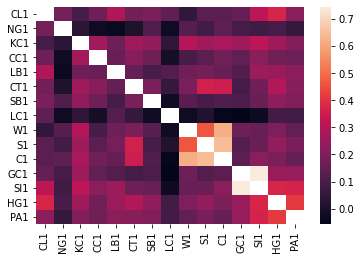

In [7]:
corrmat = retsx.corr()
#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}:\n{info.loc[pair_min[0]].Name} with {info.loc[pair_min[1]].Name}.\n')
print(f'MAX Correlation pair is {pair_max}:\n{info.loc[pair_max[0]].Name} with {info.loc[pair_max[1]].Name}.')

corrmat

In [8]:
wts_full = tangency_weights(retsx)
wts_diag = tangency_weights(retsx, scale_cov=0)

wts = pd.concat([wts_full,wts_diag],axis=1)
wts.columns = ['Full','Diagonalized']
wts

,Full,Diagonalized
CL1,0.012067,0.047812
NG1,0.056080,0.033557
KC1,-0.071404,0.029460
CC1,0.073451,0.054297
LB1,0.084593,0.055004
CT1,-0.010031,0.040946
SB1,0.062329,0.051266
LC1,0.126051,0.056679
W1,-0.009010,0.052866
S1,0.027120,0.068436


In [9]:
retsx_tan = retsx @ wts
df = performanceMetrics(retsx_tan,annualization=12)
df.style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max,VaR (0.05),CVaR (0.05)
Full,8.76%,11.64%,75.28%,-13.97%,10.93%,-4.16%,-6.59%
Diagonalized,8.91%,14.38%,61.91%,-16.86%,14.11%,-5.45%,-8.86%


# Now with Hedge Funds

### These funds are highly correlated

In [10]:
hf = pd.read_excel('../data/hedge_data.xls', sheet_name = [1,2], index_col = 0)
hf = pd.concat(hf.values(), axis=1)
hf.head()

,Total Index,Convertible Arbitrage,Dedicated Short Bias,Emerging Markets,Equity Market Neutral,Event Driven,Event Driven Distressed,Event Driven Multi-Strategy,Event Driven Risk Arbitrage,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Managed Futures,Multi-Strategy,Market Equity Index
date,,,,,,,,,,,,,,,
1994-04-30,-0.0196,-0.0274,0.0106,-0.0858,0.0003,-0.0088,-0.0093,-0.0079,-0.0118,-0.0042,-0.0181,-0.0178,0.0064,0.0236,0.0068
1994-05-31,0.0198,-0.0127,0.0200,-0.0098,-0.0036,-0.0040,-0.0109,0.0044,0.0000,0.0054,0.0355,0.0032,0.0051,-0.0372,0.0057
1994-06-30,-0.0104,-0.0002,0.0612,0.0024,0.0047,-0.0036,-0.0118,0.0060,-0.0005,-0.0063,-0.0115,-0.0254,0.0392,0.0338,-0.0303
1994-07-31,0.0010,-0.0011,-0.0143,0.0556,-0.0125,0.0029,0.0155,-0.0121,0.0032,-0.0043,-0.0060,0.0104,-0.0126,-0.0248,0.0281
1994-08-31,0.0256,-0.0025,-0.0587,0.1621,-0.0120,0.0061,0.0183,-0.0093,0.0148,-0.0030,0.0254,0.0143,-0.0048,-0.0345,0.0401


In [11]:
performanceMetrics(hf,annualization=12, quantile=.01)

,Mean,Vol,Sharpe,Min,Max,VaR (0.01),CVaR (0.01)
Total Index,0.060352,0.073219,0.824271,-0.0794,0.0813,-0.061296,-0.070467
Convertible Arbitrage,0.045781,0.068567,0.667692,-0.1277,0.0580,-0.059764,-0.104833
Dedicated Short Bias,-0.065563,0.168179,-0.389838,-0.1129,0.2232,-0.094772,-0.101767
Emerging Markets,0.051445,0.145699,0.353094,-0.2342,0.1621,-0.102384,-0.158300
Equity Market Neutral,0.024741,0.101881,0.242846,-0.4063,0.0365,-0.032712,-0.165567
Event Driven,0.060629,0.062192,0.974869,-0.1216,0.0419,-0.053536,-0.078200
Event Driven Distressed,0.070747,0.064908,1.089955,-0.1284,0.0412,-0.053092,-0.080100
Event Driven Multi-Strategy,0.055888,0.067533,0.827567,-0.1191,0.0477,-0.061192,-0.081367
Event Driven Risk Arbitrage,0.033653,0.040749,0.825869,-0.0654,0.0340,-0.032040,-0.044800
Fixed Income Arbitrage,0.027131,0.056769,0.477915,-0.1422,0.0430,-0.069172,-0.095267


In [12]:
maximumDrawdown(hf)

,Max Drawdown,Peak,Bottom,Recover,Peak to Recover
Total Index,-0.228549,2007-10-31,2009-02-28,2010-12-31,1157 days
Convertible Arbitrage,-0.355066,2007-10-31,2008-12-31,2010-08-31,1035 days
Dedicated Short Bias,-0.794977,1994-06-30,2012-12-31,NaT,NaT
Emerging Markets,-0.492723,1997-07-31,1999-01-31,2005-02-28,2769 days
Equity Market Neutral,-0.459038,2008-06-30,2009-02-28,NaT,NaT
Event Driven,-0.225103,2007-10-31,2009-02-28,2010-10-31,1096 days
Event Driven Distressed,-0.265531,2007-06-30,2009-03-31,2011-01-31,1311 days
Event Driven Multi-Strategy,-0.207367,2007-10-31,2009-02-28,2010-04-30,912 days
Event Driven Risk Arbitrage,-0.098995,2001-05-31,2003-03-31,2004-03-31,1035 days
Fixed Income Arbitrage,-0.329586,2007-04-30,2008-12-31,2012-01-31,1737 days


<AxesSubplot:>

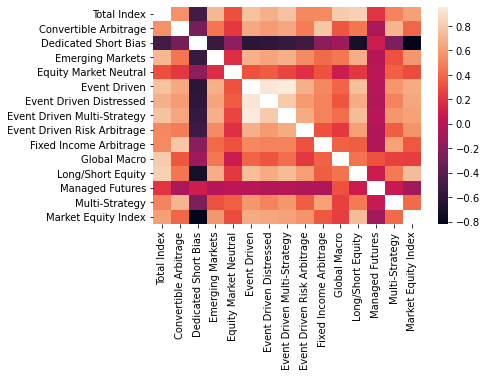

In [13]:
corrmat = hf.copy().corr()
#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

In [14]:
corrmat

,Total Index,Convertible Arbitrage,Dedicated Short Bias,Emerging Markets,Equity Market Neutral,Event Driven,Event Driven Distressed,Event Driven Multi-Strategy,Event Driven Risk Arbitrage,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Managed Futures,Multi-Strategy,Market Equity Index
Total Index,NaN,0.551937,-0.504759,0.721689,0.300644,0.759523,0.686178,0.764805,0.515525,0.525936,0.799782,0.828441,0.195384,0.503699,0.616861
Convertible Arbitrage,0.551937,NaN,-0.289713,0.448438,0.216074,0.656380,0.603493,0.639827,0.476038,0.778292,0.327540,0.449577,-0.065717,0.704156,0.386890
Dedicated Short Bias,-0.504759,-0.289713,NaN,-0.551129,-0.185695,-0.613694,-0.596162,-0.564542,-0.522769,-0.206221,-0.113159,-0.710855,0.078119,-0.267407,-0.819765
Emerging Markets,0.721689,0.448438,-0.551129,NaN,0.170734,0.693220,0.633044,0.687183,0.530808,0.404313,0.453737,0.672132,-0.022032,0.307450,0.580916
Equity Market Neutral,0.300644,0.216074,-0.185695,0.170734,NaN,0.317216,0.353053,0.268852,0.181841,0.317481,0.070551,0.218022,0.000642,0.362336,0.295858
Event Driven,0.759523,0.656380,-0.613694,0.693220,0.317216,NaN,0.937137,0.958707,0.684246,0.517848,0.380546,0.743734,-0.020117,0.570593,0.666597
Event Driven Distressed,0.686178,0.603493,-0.596162,0.633044,0.353053,0.937137,NaN,0.805197,0.595742,0.495979,0.325482,0.666634,-0.039224,0.500085,0.641726
Event Driven Multi-Strategy,0.764805,0.639827,-0.564542,0.687183,0.268852,0.958707,0.805197,NaN,0.664202,0.498449,0.415183,0.733966,-0.011143,0.573027,0.620337
Event Driven Risk Arbitrage,0.515525,0.476038,-0.522769,0.530808,0.181841,0.684246,0.595742,0.664202,NaN,0.313304,0.218763,0.609479,-0.052966,0.356590,0.565011
Fixed Income Arbitrage,0.525936,0.778292,-0.206221,0.404313,0.317481,0.517848,0.495979,0.498449,0.313304,NaN,0.372914,0.359133,-0.048240,0.624370,0.337142


In [15]:
corr_rank = corrmat.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}.')
print(f'MAX Correlation pair is {pair_max}.')

MIN Correlation pair is ('Dedicated Short Bias', 'Market Equity Index').
MAX Correlation pair is ('Event Driven Multi-Strategy', 'Event Driven').


In [16]:
wts_full = tangency_weights(hf)
wts_diag = tangency_weights(hf, scale_cov=0)

wts = pd.concat([wts_full,wts_diag],axis=1)
wts.columns = ['Full','Diagonalized']
wts

,Full,Diagonalized
Total Index,-1.908837,0.082786
Convertible Arbitrage,-0.105226,0.071610
Dedicated Short Bias,-0.034824,-0.017046
Emerging Markets,-0.058782,0.017821
Equity Market Neutral,0.058666,0.017529
Event Driven,-4.002152,0.115270
Event Driven Distressed,2.552029,0.123486
Event Driven Multi-Strategy,2.101931,0.090115
Event Driven Risk Arbitrage,0.503521,0.149040
Fixed Income Arbitrage,-0.126418,0.061908


In [17]:
hf_tan = hf @ wts
hf = performanceMetrics(hf_tan,annualization=12)
hf.style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max,VaR (0.05),CVaR (0.05)
Full,9.96%,4.98%,200.07%,-5.76%,4.01%,-1.48%,-2.63%
Diagonalized,5.64%,5.42%,104.01%,-8.05%,3.88%,-1.98%,-3.71%
